In [1]:
import os
import os.path as path

In [2]:
data_base_path = 'metadata'

In [3]:
metadata_path = path.join(data_base_path, 'Metadata')
label_filename = path.join(metadata_path, 'class-descriptions-boxable.csv')

with open(label_filename, 'r', encoding='utf-8') as f:
    lines = f.read().splitlines()
    
labels = [line.split(',') for line in lines]
label_dict = {label_name:real_name for label_name, real_name in labels}

In [4]:
label_dict

{'/m/011k07': 'Tortoise',
 '/m/011q46kg': 'Container',
 '/m/012074': 'Magpie',
 '/m/0120dh': 'Sea turtle',
 '/m/01226z': 'Football',
 '/m/012n7d': 'Ambulance',
 '/m/012w5l': 'Ladder',
 '/m/012xff': 'Toothbrush',
 '/m/012ysf': 'Syringe',
 '/m/0130jx': 'Sink',
 '/m/0138tl': 'Toy',
 '/m/013y1f': 'Organ (Musical Instrument)',
 '/m/01432t': 'Cassette deck',
 '/m/014j1m': 'Apple',
 '/m/014sv8': 'Human eye',
 '/m/014trl': 'Cosmetics',
 '/m/014y4n': 'Paddle',
 '/m/0152hh': 'Snowman',
 '/m/01599': 'Beer',
 '/m/01_5g': 'Chopsticks',
 '/m/015h_t': 'Human beard',
 '/m/015p6': 'Bird',
 '/m/015qbp': 'Parking meter',
 '/m/015qff': 'Traffic light',
 '/m/015wgc': 'Croissant',
 '/m/015x4r': 'Cucumber',
 '/m/015x5n': 'Radish',
 '/m/0162_1': 'Towel',
 '/m/0167gd': 'Doll',
 '/m/016m2d': 'Skull',
 '/m/0174k2': 'Washing machine',
 '/m/0174n1': 'Glove',
 '/m/0175cv': 'Tick',
 '/m/0176mf': 'Belt',
 '/m/017ftj': 'Sunglasses',
 '/m/018j2': 'Banjo',
 '/m/018p4k': 'Cart',
 '/m/018xm': 'Ball',
 '/m/01940j': 'Backpa

In [5]:
inverse_label_dict = {v:k for k,v in label_dict.items()}

In [6]:
inverse_label_dict

{'Tortoise': '/m/011k07',
 'Container': '/m/011q46kg',
 'Magpie': '/m/012074',
 'Sea turtle': '/m/0120dh',
 'Football': '/m/01226z',
 'Ambulance': '/m/012n7d',
 'Ladder': '/m/012w5l',
 'Toothbrush': '/m/012xff',
 'Syringe': '/m/012ysf',
 'Sink': '/m/0130jx',
 'Toy': '/m/0138tl',
 'Organ (Musical Instrument)': '/m/013y1f',
 'Cassette deck': '/m/01432t',
 'Apple': '/m/014j1m',
 'Human eye': '/m/014sv8',
 'Cosmetics': '/m/014trl',
 'Paddle': '/m/014y4n',
 'Snowman': '/m/0152hh',
 'Beer': '/m/01599',
 'Chopsticks': '/m/01_5g',
 'Human beard': '/m/015h_t',
 'Bird': '/m/015p6',
 'Parking meter': '/m/015qbp',
 'Traffic light': '/m/015qff',
 'Croissant': '/m/015wgc',
 'Cucumber': '/m/015x4r',
 'Radish': '/m/015x5n',
 'Towel': '/m/0162_1',
 'Doll': '/m/0167gd',
 'Skull': '/m/016m2d',
 'Washing machine': '/m/0174k2',
 'Glove': '/m/0174n1',
 'Tick': '/m/0175cv',
 'Belt': '/m/0176mf',
 'Sunglasses': '/m/017ftj',
 'Banjo': '/m/018j2',
 'Cart': '/m/018p4k',
 'Ball': '/m/018xm',
 'Backpack': '/m/0194

In [7]:
box_path = path.join(data_base_path, 'Boxes')
train_box_filename = path.join(box_path, 'train-annotations-bbox.csv')
val_box_filename = path.join(box_path, 'validation-annotations-bbox.csv')
test_box_filename = path.join(box_path, 'test-annotations-bbox.csv')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [9]:
analyze_base_path = 'analyze'
for_retina_path = path.join(analyze_base_path, 'for_retina')
os.makedirs(for_retina_path, exist_ok=True)

In [10]:
detection_path = path.join(analyze_base_path, 'detection')
os.makedirs(detection_path, exist_ok=True)

In [11]:
frequency_path = path.join(analyze_base_path, 'frequency')
os.makedirs(frequency_path, exist_ok=True)

In [13]:
for target in ['train', 'validation', 'test']:
    for_retina_filename = path.join(for_retina_path, target+'_for_retina.csv')
    with open(for_retina_filename, 'r') as f:
        text = f.read()

    box_inform_list = [line.split(',') for line in text.splitlines()]
    detection_size_base_filename = path.join(detection_path, target+'_detection_box_size.csv')
    with open(detection_size_base_filename, 'w') as f:
        f.write(','.join(['width', 'height', 'size', 'real_label'])+'\n')
        for _,x1,y2,x2,y1,real_label in box_inform_list:
            width = int(x2) - int(x1)
            height = int(y2) - int(y1)
            size = width * height
            f.write(','.join([str(width), str(height), str(size), real_label])+'\n')

In [56]:
for target in ['train', 'validation', 'test']:
    detection_size_base_filename = path.join(detection_path, target+'_detection_box_size.csv')
    with open(detection_size_base_filename, 'r') as f:
        text = f.read()

    box_size_inform_list = [line.split(',') for line in text.splitlines()[1:]]
    box_size_dict = {k:[] for k in inverse_label_dict.keys()}
    for _,_,size,real_label in box_size_inform_list:
        box_size_dict[real_label].append(int(size))

    for real_label in box_size_dict.keys():
        if not box_size_dict[real_label]:
            box_size_dict[real_label].append(0)
    
    box_size_mean_dict = {k:np.mean(v) for k, v in box_size_dict.items()}
    box_size_std_dict = {k:np.std(v) for k, v in box_size_dict.items()}
    box_size_min_dict = {k:np.min(v) for k, v in box_size_dict.items()}
    box_size_max_dict = {k:np.max(v) for k, v in box_size_dict.items()}

    frequency_filename = path.join(frequency_path, target+'_data_frequency.csv')
    with open(frequency_filename, 'r') as f:
        text = f.read()
    sorted_label_list = [line.split(',')[1] for line in text.splitlines()[1:]]

    detection_size_filename = path.join(detection_path, target+'_detection_box_analysis.csv')
    with open(detection_size_filename, 'w') as f:
        f.write(','.join(['real_label', 'mean', 'std', 'min', 'max'])+'\n')
        for real_label in sorted_label_list:
            f.write(','.join([real_label, 
                              str(np.around(box_size_mean_dict[real_label], decimals=2)), 
                              str(np.around(box_size_var_dict[real_label], decimals=2)),
                              str(np.around(box_size_min_dict[real_label], decimals=2)),
                              str(np.around(box_size_max_dict[real_label], decimals=2))])
                    +'\n')

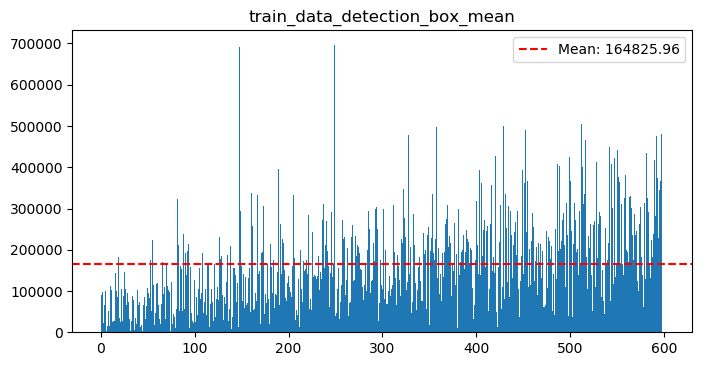

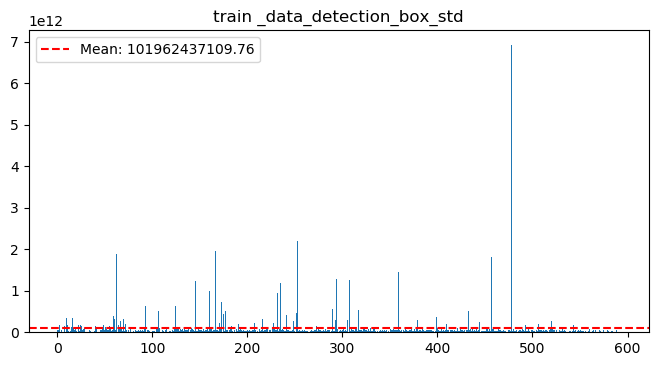

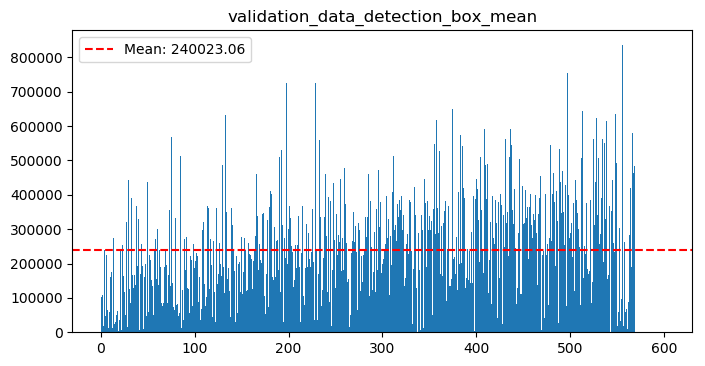

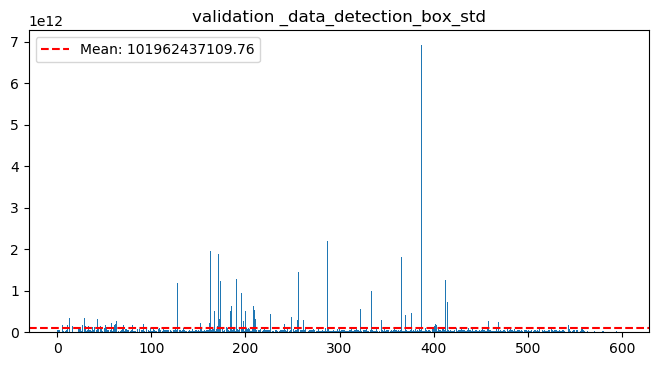

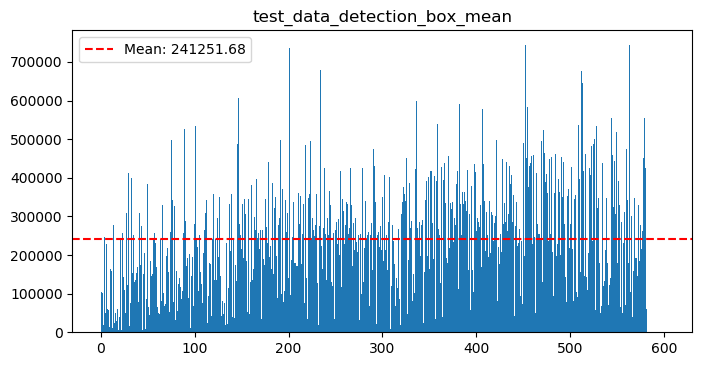

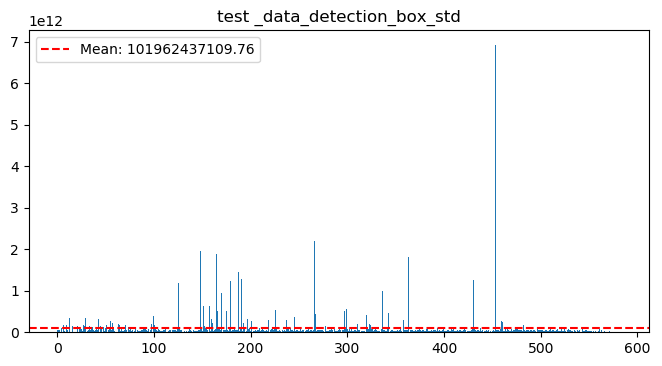

In [57]:
for target in ['train', 'validation', 'test']:
    detection_size_filename = path.join(detection_path, target+'_detection_box_analysis.csv')
    with open(detection_size_filename, 'r') as f:
        lines = f.read().splitlines()
    temp_inform_list = [line.split(',') for line in lines[1:]]
    box_size_mean_list = [float(inform[1]) for inform in temp_inform_list]
    box_size_std_list = [float(inform[2]) for inform in temp_inform_list]
    
    mean_of_mean = np.around(np.mean(np.nan_to_num(box_size_mean_list)), decimals=2)
    mean_of_std = np.around(np.mean(np.nan_to_num(box_size_std_list)), decimals=2)

    plt.figure(figsize=(8,4), dpi=100)
    plt.title(target+'_data_detection_box_mean')
    plt.bar(np.arange(len(box_size_mean_list)), box_size_mean_list, width=1)
    plt.axhline(y=mean_of_mean, color='r', linestyle='--', label='Mean: '+str(mean_of_mean))
#     plt.xticks([])
    plt.legend()
    plt.savefig(path.join(detection_path, target+'_data_detection_box_mean.png'))
    plt.show()
    
    plt.figure(figsize=(8,4), dpi=100)
    plt.title(target+' _data_detection_box_std')
    plt.bar(np.arange(len(box_size_std_list)), box_size_std_list, width=1)
    plt.axhline(y=mean_of_std, color='r', linestyle='--', label='Mean: '+str(mean_of_std))
#     plt.xticks([])
    plt.legend()
    plt.savefig(path.join(detection_path, target+'_data_detection_box_std.png'))
    plt.show()

In [58]:
for target in ['train', 'validation', 'test']:
    detection_size_filename = path.join(detection_path, target+'_detection_box_analysis.csv')
    with open(detection_size_filename, 'r') as f:
        lines = f.read().splitlines()
    temp_inform_list = [line.split(',') for line in lines[1:]]
    box_real_label_list = [inform[0] for inform in temp_inform_list]
    box_size_mean_list = [float(inform[1]) for inform in temp_inform_list]
    box_size_std_list = [float(inform[2]) for inform in temp_inform_list]
    box_size_min_list = [int(inform[3]) for inform in temp_inform_list]
    box_size_max_list = [int(inform[4]) for inform in temp_inform_list]

#     temp_array = temp_array[np.isfinite(box_size_std_list)]
    temp_array = np.nan_to_num(box_size_std_list)
    abnormal_index_array = np.argsort(temp_array)[-30:][::-1]
    
    abnormal_filename = path.join(detection_path, target+'_abnormal_label_top30.csv')
    with open(abnormal_filename, 'w') as f:
        f.write(','.join(['real_label', 'mean', 'std', 'min', 'max'])+'\n')
        for index in abnormal_index_array:
            f.write(','.join([str(box_real_label_list[index]), 
                              str(box_size_mean_list[index]), 
                              str(box_size_std_list[index]), 
                              str(box_size_min_list[index]), 
                              str(box_size_max_list[index]),
                             ])
                    +'\n')

array([453, 266, 148, 165, 363, 187, 191, 431, 179, 125, 336, 170, 399,
       151, 157, 299, 226, 166, 175, 297, 343, 267, 320, 100, 245,  29,
        13, 197,  43, 160], dtype=int64)